In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from scipy import optimize

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df_bl23 = pd.read_csv('./Données/baseline_23_c_light_curve_data.csv')
df_bl24 = pd.read_csv('./Données/baseline_24_c_light_curve_data.csv')
df_obs_pri_r = pd.read_csv('./Données/obs_pri_r_c_light_curve_data.csv')
df_obs_sec_g = pd.read_csv('./Données/obs_sec_g_c_light_curve_data.csv')
df_obs_sec_r = pd.read_csv('./Données/obs_sec_r_c_light_curve_data.csv')

column_names = df_bl23.columns.tolist()
print(column_names)
print(df_bl23['filter'][0])
print(df_bl24['filter'][0])

['observation_date', 'target_intensity', 'reference_intensity', 'normalized_intensity', 'filter']
r'
r'


In [4]:
def mjd_conversion(mjd_arr):
    return Time(mjd_arr, format='jd').iso


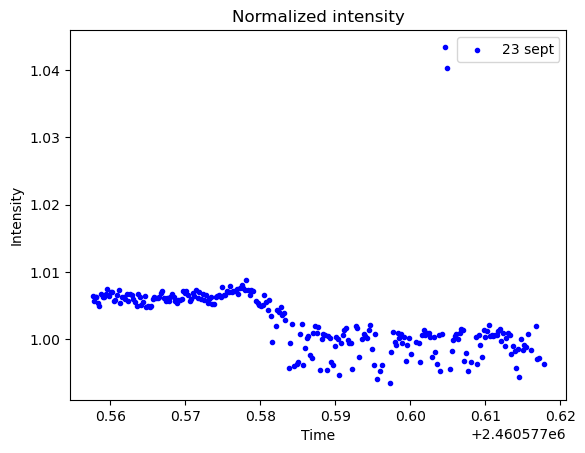

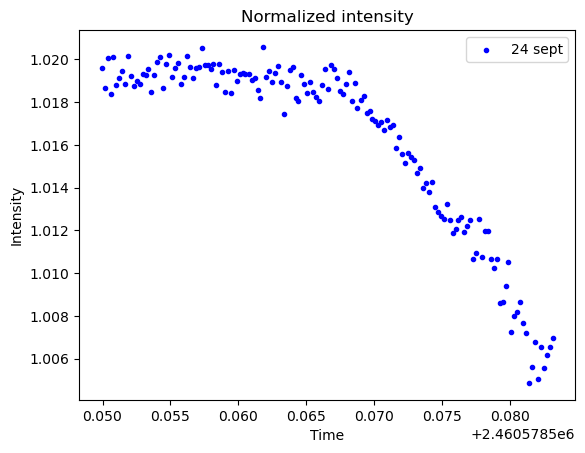

In [5]:
def plot_wrapper(data_array, title, x_lbl, y_lbl, legend_loc='upper right', output_filename=''):
    for line in data_array:
        plt.scatter(line[0], line[1], label=line[2], color=line[3], marker=line[4])
    plt.title(title)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.legend(loc=legend_loc)
    if output_filename != '':
        plt.savefig(output_filename)
    plt.show()

x_bl_23 = df_bl23['observation_date'].to_numpy()
y_bl_23 = 1/df_bl23['normalized_intensity'].to_numpy()

x_bl_24 = df_bl24['observation_date'].to_numpy()
y_bl_24 = 1/df_bl24['normalized_intensity'].to_numpy()

plot_wrapper([[x_bl_23, y_bl_23, '23 sept', 'blue', '.']],
             'Normalized intensity', 'Time', 'Intensity')

plot_wrapper([[x_bl_24, y_bl_24, '24 sept', 'blue', '.']],
             'Normalized intensity', 'Time', 'Intensity')

mean_bl_23=np.mean(y_bl_23)
std_bl_23=np.std(y_bl_23)

mean_bl_24=np.mean(y_bl_24)
std_bl_24=np.std(y_bl_24)

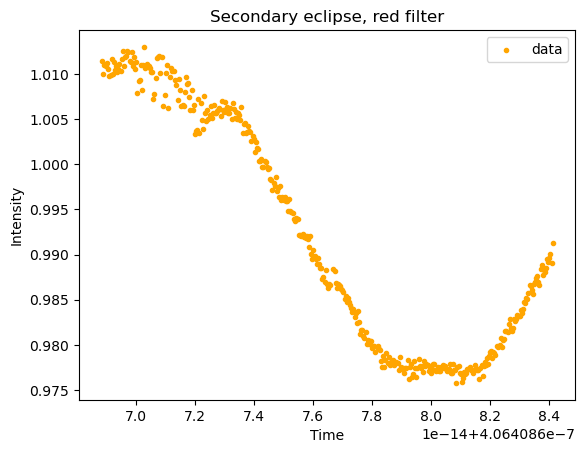

In [6]:
x_sec_r = 1/df_obs_sec_r['observation_date'].to_numpy()
y_sec_r = 1/df_obs_sec_r['normalized_intensity'].to_numpy()

plot_wrapper([[x_sec_r, y_sec_r, 'data', 'orange', '.']],
             'Secondary eclipse, red filter', 'Time', 'Intensity', output_filename='sec_r.png')

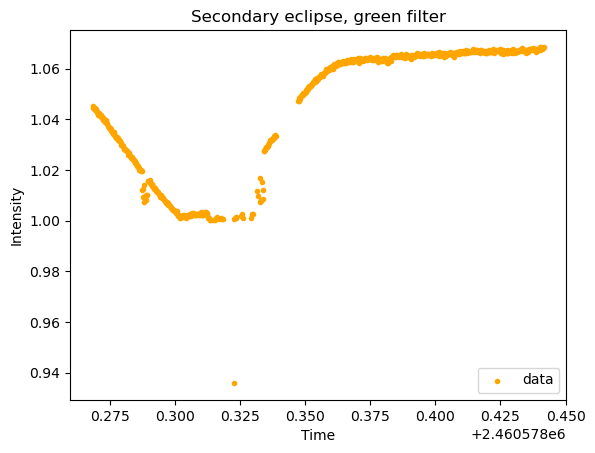

In [7]:
x_sec_g = df_obs_sec_g['observation_date'].to_numpy()
y_sec_g = 1/(df_obs_sec_g['normalized_intensity'].to_numpy())

plot_wrapper([[x_sec_g, y_sec_g, 'data', 'orange', '.']],
             'Secondary eclipse, green filter', 'Time', 'Intensity', legend_loc='lower right', output_filename='sec_g.png')

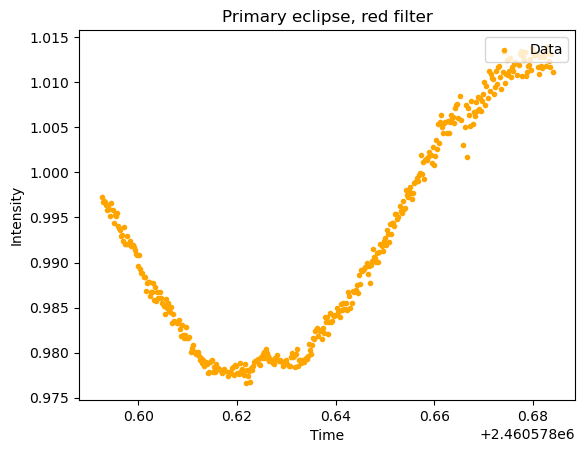

In [8]:
x_pri_r = df_obs_pri_r['observation_date'].to_numpy()
y_pri_r = 1/(df_obs_pri_r['normalized_intensity'].to_numpy())

plot_wrapper([[x_pri_r, y_pri_r, 'Data', 'orange', '.']],
             'Primary eclipse, red filter', 'Time', 'Intensity', output_filename='pri_r.png')

In [9]:
def fft_wrapper(x_arr, y_arr):
    fs = 1/(x_arr[1]-x_arr[0])
    foufou = np.fft.fft(y_arr-np.mean(y_arr))
    freqs = np.fft.fftfreq(len(x_arr),d=fs)
    spectrum = np.abs(foufou)
    return freqs, spectrum

In [10]:
x_sec_tot_r = np.hstack((x_bl_23-0.279, x_sec_r, x_bl_23-0.121))
y_sec_tot_r = np.hstack((y_bl_23, y_sec_r, y_bl_23))

# Ne fonctionne pas tel quel, je travaillerai dessus si jamais on décide d'utiliser les baselines pour analyser le signal
#plot_wrapper([[x_sec_tot_r, y_sec_tot_r, '23 sept', 'blue', '.']],
#             'Secondary eclipse, red filter', 'Time', 'Intensity')


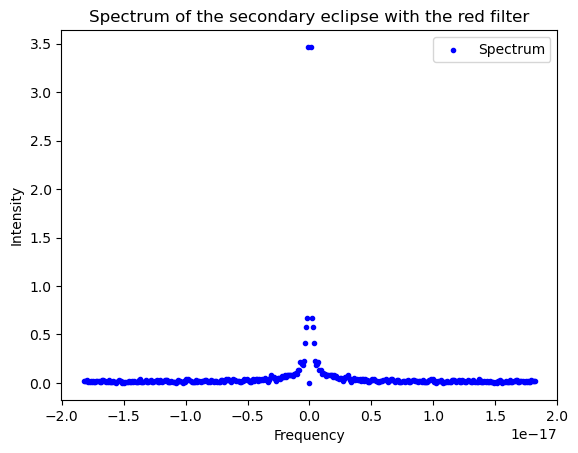

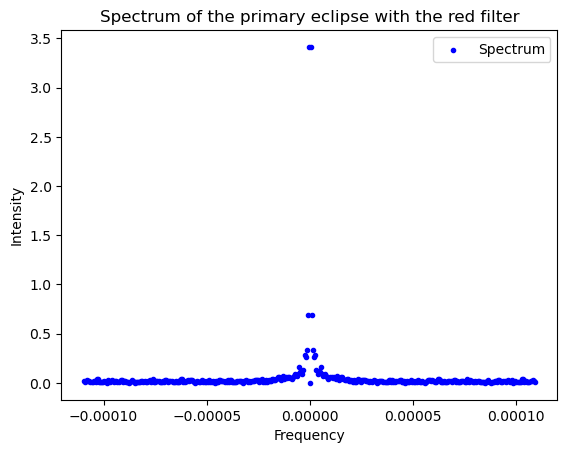

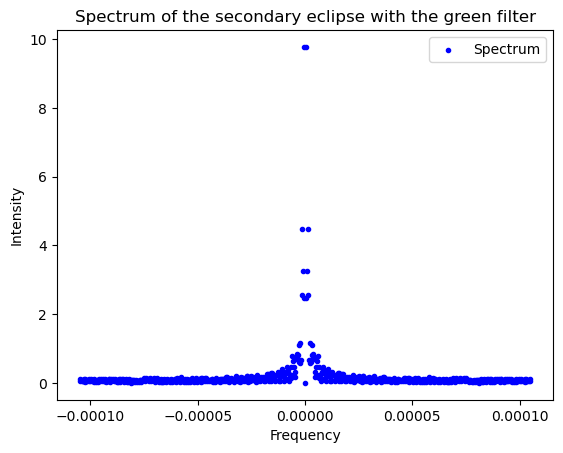

In [11]:
freqs_sec_r, spectrum_sec_r = fft_wrapper(x_sec_r, y_sec_r)
freqs_pri_r, spectrum_pri_r = fft_wrapper(x_pri_r, y_pri_r)
freqs_sec_g, spectrum_sec_g = fft_wrapper(x_sec_g, y_sec_g)

plot_wrapper([[freqs_sec_r, spectrum_sec_r, 'Spectrum', 'blue', '.']],
             'Spectrum of the secondary eclipse with the red filter', 'Frequency', 'Intensity', output_filename='sec_r_fft.png')
plot_wrapper([[freqs_pri_r, spectrum_pri_r, 'Spectrum', 'blue', '.']],
             'Spectrum of the primary eclipse with the red filter', 'Frequency', 'Intensity', output_filename='pri_r_fft.png')
plot_wrapper([[freqs_sec_g, spectrum_sec_g, 'Spectrum', 'blue', '.']],
             'Spectrum of the secondary eclipse with the green filter', 'Frequency', 'Intensity', output_filename='sec_g_fft.png')

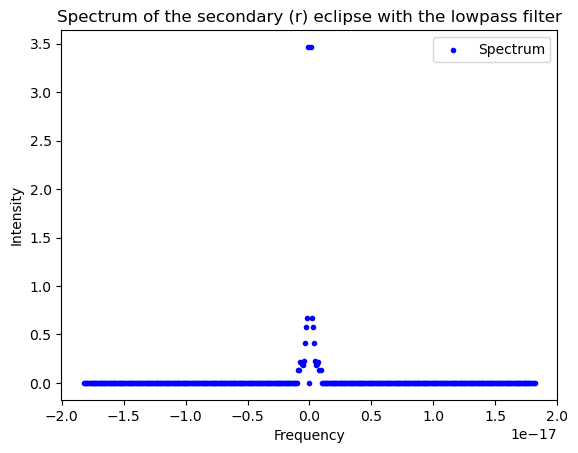

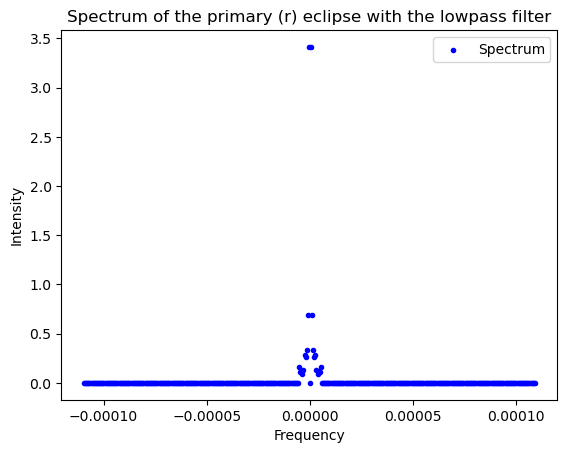

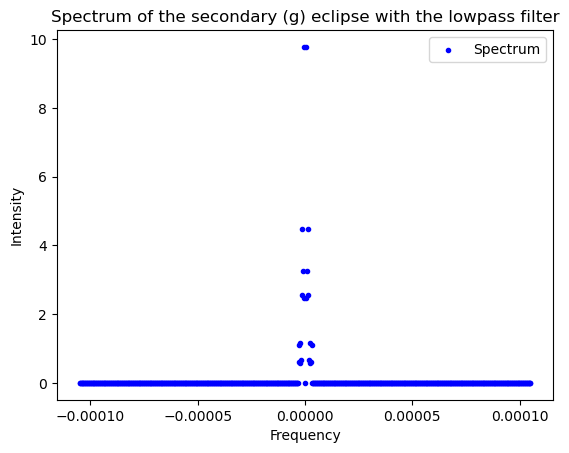

In [12]:
cutoff_sec_r = 10
filtered_sec_r = spectrum_sec_r[:]
filtered_sec_r[cutoff_sec_r+1:-cutoff_sec_r] = 0

cutoff_pri_r = 10
filtered_pri_r = spectrum_pri_r[:]
filtered_pri_r[cutoff_pri_r+1:-cutoff_pri_r] = 0

cutoff_sec_g = 10
filtered_sec_g = spectrum_sec_g[:]
filtered_sec_g[cutoff_sec_g+1:-cutoff_sec_g] = 0

plot_wrapper([[freqs_sec_r, filtered_sec_r, 'Spectrum', 'blue', '.']],
             'Spectrum of the secondary (r) eclipse with the lowpass filter', 'Frequency', 'Intensity', output_filename='sec_r_fft_filtered.png')

plot_wrapper([[freqs_pri_r, filtered_pri_r, 'Spectrum', 'blue', '.']],
             'Spectrum of the primary (r) eclipse with the lowpass filter', 'Frequency', 'Intensity', output_filename='pri_r_fft_filtered.png')

plot_wrapper([[freqs_sec_g, filtered_sec_g, 'Spectrum', 'blue', '.']],
             'Spectrum of the secondary (g) eclipse with the lowpass filter', 'Frequency', 'Intensity', output_filename='sec_g_fft_filtered.png')

C:\Users\jiyan\anaconda3\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\jiyan\anaconda3\lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


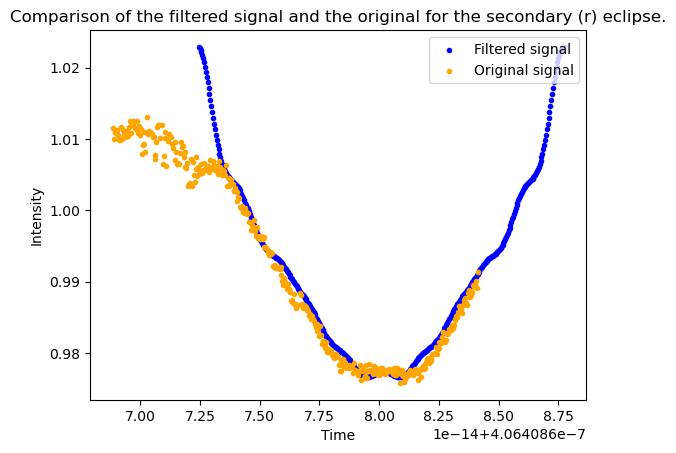

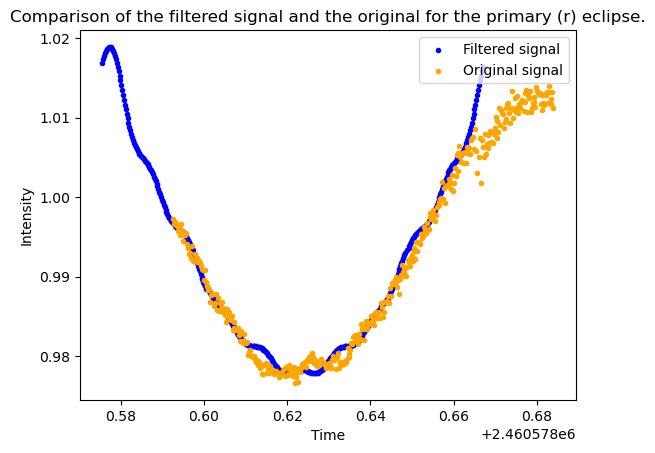

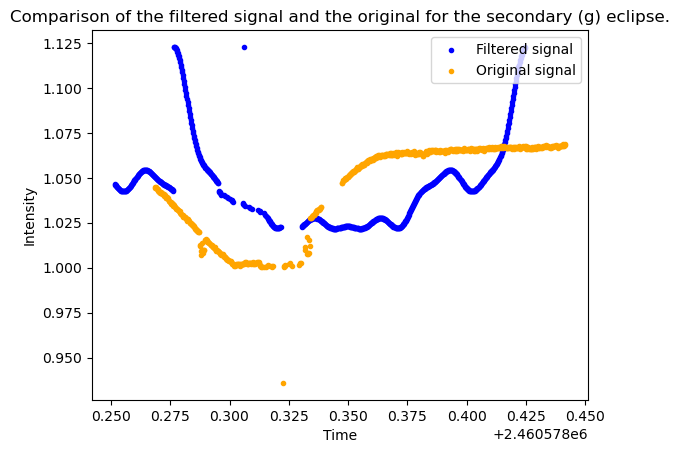

In [13]:
plot_wrapper([[x_sec_r+0.36e-14, np.fft.ifft(spectrum_sec_r)+np.mean(y_sec_r), 'Filtered signal', 'blue', '.'],
             [x_sec_r, y_sec_r, 'Original signal', 'orange', '.']],
             'Comparison of the filtered signal and the original for the secondary (r) eclipse.', 'Time', 'Intensity', output_filename='sec_r_comparison.png')

plot_wrapper([[x_pri_r-0.017, np.fft.ifft(spectrum_pri_r)+np.mean(y_pri_r), 'Filtered signal', 'blue', '.'],
             [x_pri_r, y_pri_r, 'Original signal', 'orange', '.']],
             'Comparison of the filtered signal and the original for the primary (r) eclipse.', 'Time', 'Intensity', output_filename='pri_r_comparison.png')

plot_wrapper([[x_sec_g-0.017, np.fft.ifft(spectrum_sec_g)+np.mean(y_sec_g), 'Filtered signal', 'blue', '.'],
             [x_sec_g, y_sec_g, 'Original signal', 'orange', '.']],
             'Comparison of the filtered signal and the original for the secondary (g) eclipse.', 'Time', 'Intensity', output_filename='sec_g_comparison.png')

In [14]:
# Credits: https://gist.github.com/ruoyu0088
def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

C:\Users\jiyan\anaconda3\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


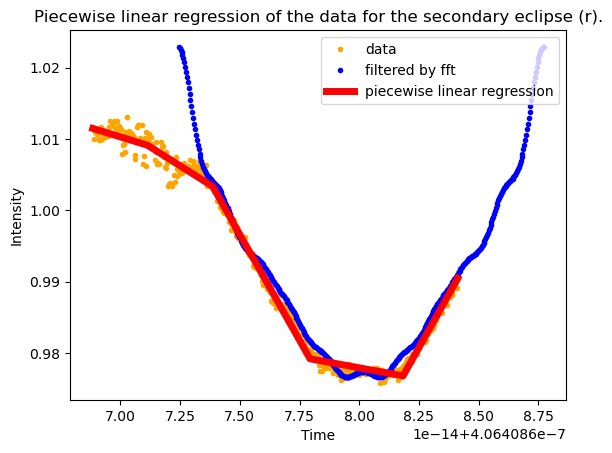

In [15]:
fx, fy = segments_fit(x_sec_r, y_sec_r, 5)

plt.plot(x_sec_r, y_sec_r, ".", label='data', color='orange')
plt.plot(x_sec_r+0.36e-14, np.fft.ifft(spectrum_sec_r)+np.mean(y_sec_r), '.', label='filtered by fft', color='blue')
plt.plot(fx, fy, label='piecewise linear regression', color='red', linewidth='5')

plot_wrapper([],
             'Piecewise linear regression of the data for the secondary eclipse (r).', 'Time', 'Intensity', output_filename='sec_r_fit.png')

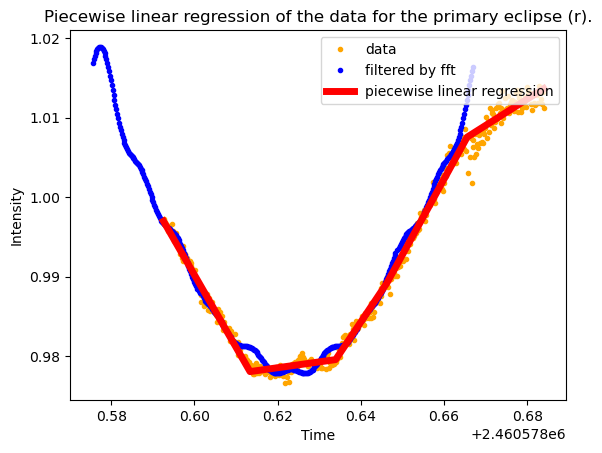

In [16]:
fx_pri_r, fy_pri_r = segments_fit(x_pri_r, y_pri_r, 5)

plt.plot(x_pri_r, y_pri_r, ".", label='data', color='orange')
plt.plot(x_pri_r-0.017, np.fft.ifft(spectrum_pri_r)+np.mean(y_pri_r), '.', label='filtered by fft', color='blue')
plt.plot(fx_pri_r, fy_pri_r, label='piecewise linear regression', color='red', linewidth='5')

plot_wrapper([],
             'Piecewise linear regression of the data for the primary eclipse (r).', 'Time', 'Intensity', output_filename='pri_r_fit.png')

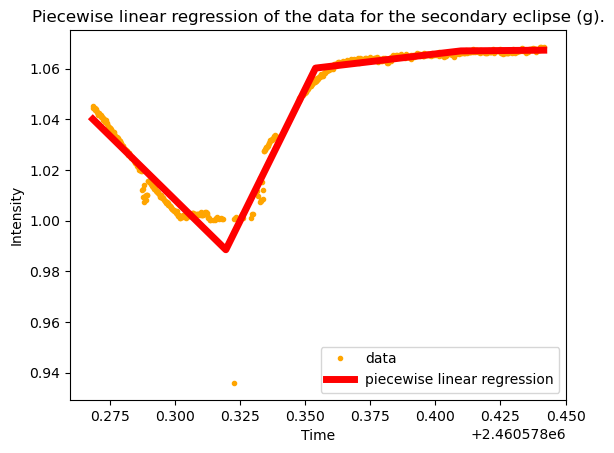

In [17]:
fx_sec_g, fy_sec_g = segments_fit(x_sec_g, y_sec_g, 4)

plt.plot(x_sec_g, y_sec_g, ".", label='data', color='orange')
plt.plot(fx_sec_g, fy_sec_g, label='piecewise linear regression', color='red', linewidth='5')

plot_wrapper([],
             'Piecewise linear regression of the data for the secondary eclipse (g).', 'Time', 'Intensity', legend_loc='lower right', output_filename='sec_g_fit.png')